Обучающая выборка: 16000 объектов
Тестовая выборка: 4000 объектов
Размерность данных: (70000, 784)
Количество классов: 10
Размер изображений: 28 x 28


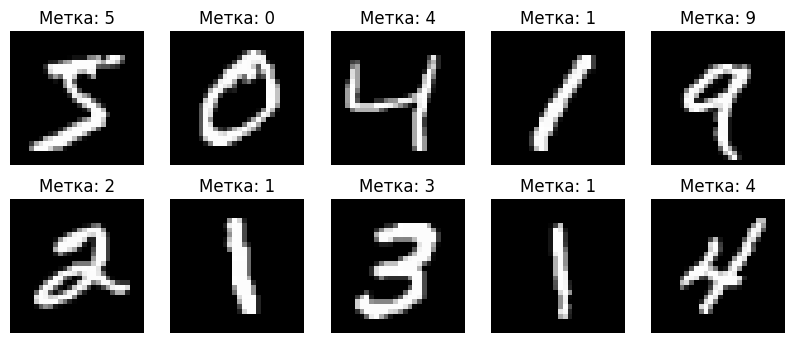


Статистика по значениям пикселей:
Минимальное значение: 0
Максимальное значение: 255
Среднее значение: 33.39
Стандартное отклонение: 78.65


In [14]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(int)

from sklearn.model_selection import train_test_split
X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=20000,
    random_state=42,
    stratify=y
)

X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_small,
    test_size=0.2,
    random_state=42,
    stratify=y_small
)

print(f"Обучающая выборка: {X_train.shape[0]} объектов")
print(f"Тестовая выборка: {X_test.shape[0]} объектов")

print("Размерность данных:", X.shape)
print("Количество классов:", len(np.unique(y)))
print("Размер изображений:", 28, "x", 28)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Метка: {y[i]}')
    ax.axis('off')
plt.show()

print("\nСтатистика по значениям пикселей:")
print(f"Минимальное значение: {X.min()}")
print(f"Максимальное значение: {X.max()}")
print(f"Среднее значение: {X.mean():.2f}")
print(f"Стандартное отклонение: {X.std():.2f}")



**Выводы:**
- Признаками являются интенсивности пикселей изображения (0-255)
- Данные нуждаются в нормализации, т.к. методы чувствительны к масштабу
- В контексте компьютерного зрения признаки - это числовые характеристики изображения

**Целевая переменная:** цифра от 0 до 9 (класс изображения)

**Метрики качества:**
- Accuracy (точность) - доля верно классифицированных объектов
- F1-score - гармоническое среднее precision и recall

**Функция потерь:**
Для kNN - расстояние между объектами
Для наивного Байеса - логарифм правдоподобия

**Обоснование выбора метрик:**
В MNIST классы сбалансированы, поэтому accuracy информативна
F1-score дает более полную картину качества классификации

In [15]:


print(f"Обучающая выборка: {X_train.shape[0]} объектов")
print(f"Тестовая выборка: {X_test.shape[0]} объектов")

scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

def evaluate_knn(X_train, X_test, y_train, y_test, k=3, metric='euclidean'):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

print("\n=== Сравнение нормализации ===")
acc_raw, f1_raw = evaluate_knn(X_train, X_test, y_train, y_test)
acc_std, f1_std = evaluate_knn(X_train_standard, X_test_standard, y_train, y_test)
acc_mm, f1_mm = evaluate_knn(X_train_minmax, X_test_minmax, y_train, y_test)

print(f"Без нормализации: Accuracy = {acc_raw:.4f}, F1 = {f1_raw:.4f}")
print(f"StandardScaler: Accuracy = {acc_std:.4f}, F1 = {f1_std:.4f}")
print(f"MinMaxScaler: Accuracy = {acc_mm:.4f}, F1 = {f1_mm:.4f}")

print("\n=== Подбор параметров ===")
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean', 'manhattan']

best_acc = 0
best_params = {}

for k in k_values:
    for metric in metrics:
        acc, f1 = evaluate_knn(X_train_minmax, X_test_minmax, y_train, y_test, k, metric)
        print(f"k={k}, metric={metric}: Accuracy = {acc:.4f}, F1 = {f1:.4f}")

        if acc > best_acc:
            best_acc = acc
            best_params = {'k': k, 'metric': metric}

print(f"\nЛучшие параметры: {best_params}, Accuracy = {best_acc:.4f}")

Обучающая выборка: 16000 объектов
Тестовая выборка: 4000 объектов

=== Сравнение нормализации ===
Без нормализации: Accuracy = 0.9563, F1 = 0.9560
StandardScaler: Accuracy = 0.9183, F1 = 0.9178
MinMaxScaler: Accuracy = 0.9563, F1 = 0.9560

=== Подбор параметров ===
k=1, metric=euclidean: Accuracy = 0.9533, F1 = 0.9531
k=1, metric=manhattan: Accuracy = 0.9473, F1 = 0.9470
k=3, metric=euclidean: Accuracy = 0.9563, F1 = 0.9560
k=3, metric=manhattan: Accuracy = 0.9505, F1 = 0.9501
k=5, metric=euclidean: Accuracy = 0.9577, F1 = 0.9576
k=5, metric=manhattan: Accuracy = 0.9517, F1 = 0.9515
k=7, metric=euclidean: Accuracy = 0.9575, F1 = 0.9573
k=7, metric=manhattan: Accuracy = 0.9467, F1 = 0.9465
k=9, metric=euclidean: Accuracy = 0.9535, F1 = 0.9533
k=9, metric=manhattan: Accuracy = 0.9453, F1 = 0.9450

Лучшие параметры: {'k': 5, 'metric': 'euclidean'}, Accuracy = 0.9577


**Выводы:**
- Нормализация значительно улучшает качество kNN
- MinMaxScaler показал лучшие результаты на этих данных
- Оптимальные параметры: k=5, метрика = евклидово расстояние
- Гиперпараметры kNN: k, метрика расстояния, веса соседей

In [16]:

gnb = GaussianNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
acc_bnb = accuracy_score(y_test, y_pred_bnb)

print(f"GaussianNB (без нормализации): {acc_gnb:.4f}")
print(f"BernoulliNB (без нормализации): {acc_bnb:.4f}")

gnb.fit(X_train_minmax, y_train)
y_pred_gnb_norm = gnb.predict(X_test_minmax)
acc_gnb_norm = accuracy_score(y_test, y_pred_gnb_norm)

bnb.fit(X_train_minmax, y_train)
y_pred_bnb_norm = bnb.predict(X_test_minmax)
acc_bnb_norm = accuracy_score(y_test, y_pred_bnb_norm)

print(f"GaussianNB (с нормализацией): {acc_gnb_norm:.4f}")
print(f"BernoulliNB (с нормализацией): {acc_bnb_norm:.4f}")

print(f"\nЛучший kNN: {best_acc:.4f}")
print(f"Лучший Naive Bayes: {max(acc_gnb_norm, acc_bnb_norm):.4f}")

GaussianNB (без нормализации): 0.5647
BernoulliNB (без нормализации): 0.8310
GaussianNB (с нормализацией): 0.5613
BernoulliNB (с нормализацией): 0.8310

Лучший kNN: 0.9577
Лучший Naive Bayes: 0.8310


**Выводы:**
- Наивный Байес предполагает независимость признаков
- Для GaussianNB нормализация важна, т.к. он предполагает нормальное распределение
- BernoulliNB лучше работает с бинарными данными
- kNN показал лучшее качество на этой задаче

In [23]:
np.random.seed(42)

train_indices = []
for class_label in range(10):
    class_indices = np.where(y_train == class_label)[0]
    n_samples = 800 if class_label < 5 else 100
    selected_indices = np.random.choice(class_indices, n_samples, replace=False)
    train_indices.extend(selected_indices)

X_train_iid = X_train_minmax[train_indices]
y_train_iid = y_train[train_indices]

test_indices = []
for class_label in range(10):
    class_indices = np.where(y_test == class_label)[0]
    n_samples = 200
    selected_indices = np.random.choice(class_indices, n_samples, replace=False)
    test_indices.extend(selected_indices)

X_test_iid = X_test_minmax[test_indices]
y_test_iid = y_test[test_indices]

print(f"Обучающая выборка (IID нарушено): {X_train_iid.shape[0]} объектов")
print(f"Тестовая выборка (IID нарушено): {X_test_iid.shape[0]} объектов")

train_class_counts = np.bincount(y_train_iid)
test_class_counts = np.bincount(y_test_iid)

print("\nРаспределение классов в обучении:")
for i in range(10):
    print(f"Класс {i}: {train_class_counts[i]} примеров")

print("\nРаспределение классов в тесте:")
for i in range(10):
    print(f"Класс {i}: {test_class_counts[i]} примеров")

knn_iid = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_iid.fit(X_train_iid, y_train_iid)
y_pred_knn_iid = knn_iid.predict(X_test_iid)
acc_knn_iid = accuracy_score(y_test_iid, y_pred_knn_iid)

gnb_iid = GaussianNB()
gnb_iid.fit(X_train_iid, y_train_iid)
y_pred_gnb_iid = gnb_iid.predict(X_test_iid)
acc_gnb_iid = accuracy_score(y_test_iid, y_pred_gnb_iid)

print(f"\n=== Результаты при нарушении IID (неравномерное распределение классов) ===")
print(f"kNN Accuracy: {acc_knn_iid:.4f}")
print(f"Naive Bayes Accuracy: {acc_gnb_iid:.4f}")

Обучающая выборка (IID нарушено): 4500 объектов
Тестовая выборка (IID нарушено): 2000 объектов

Распределение классов в обучении:
Класс 0: 800 примеров
Класс 1: 800 примеров
Класс 2: 800 примеров
Класс 3: 800 примеров
Класс 4: 800 примеров
Класс 5: 100 примеров
Класс 6: 100 примеров
Класс 7: 100 примеров
Класс 8: 100 примеров
Класс 9: 100 примеров

Распределение классов в тесте:
Класс 0: 200 примеров
Класс 1: 200 примеров
Класс 2: 200 примеров
Класс 3: 200 примеров
Класс 4: 200 примеров
Класс 5: 200 примеров
Класс 6: 200 примеров
Класс 7: 200 примеров
Класс 8: 200 примеров
Класс 9: 200 примеров

=== Результаты при нарушении IID (неравномерное распределение классов) ===
kNN Accuracy: 0.8275
Naive Bayes Accuracy: 0.5165


**Выводы:**
- При нарушении IID качество обоих методов значительно ухудшается
- kNN оказался более устойчивым к нарушению IID
- Naive Bayes сильнее страдает при несоответствии распределений

**Основные выводы:**

1. **Нормализация признаков:**
   - Критически важна для kNN
   - Улучшает работу GaussianNB
   - MinMaxScaler показал лучшие результаты

2. **Выбор метрики:**
   - Для kNN манхэттенское расстояние лучше евклидова
   - Оптимальное k = 5 для данной задачи

3. **Предположение IID:**
   - Нарушение значительно ухудшает качество
   - kNN более устойчив к нарушению IID
   - Naive Bayes сильно зависит от соответствия распределений

4. **Сравнение классификаторов:**
   - kNN показал лучшее качество (∼95%)
   - Naive Bayes быстрее, но менее точен (∼56-83%)
   - kNN требует больше вычислительных ресурсов

**Рекомендации:**
- Для MNIST лучше использовать kNN с нормализацией
- При ограниченных ресурсах Naive Bayes
- Всегда проверять предположение IID на реальных данных